### Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Upload dataset and Exploratory Analysis

In [7]:
# PRA QUE ?
np.random.seed(42)

In [15]:
df = pd.read_csv('dataset.csv')

In [16]:
df.shape

(1000, 5)

In [17]:
df.head()

,user_id,group,latitude,longitude,conversion
0,1,A,35.669109,6.869443,1
1,2,B,6.497346,-7.494524,1
2,3,A,-34.285029,-170.768856,0
3,4,A,56.483104,-57.150782,1
4,5,A,33.251611,-43.129577,0


In [20]:
# Calculating conversion rate per group
conversion_rate = df.groupby('group')['conversion'].mean()
print("Conversion rates per group:")
print(conversion_rate)

Conversion rates per group:
group
A    0.300000
B    0.315686
Name: conversion, dtype: float64


In [21]:
# Divide groups:
group_A = df[df['group'] == 'A']
group_B = df[df['group'] == 'B']

In [ ]:
# Calculating average conversion rates

In [22]:
rate_conversion_A = group_A['conversion'].mean()
rate_conversion_B = group_B['conversion'].mean()

In [23]:
rate_conversion_A

0.3

In [24]:
rate_conversion_B

0.3156862745098039

### Choosing the Appropriate Statistical Test

To check if there is really a significant difference between the means of groups A and B, the Studant's T Test will be used, where:

- Null Hypothesis (H0): There is no significant difference between the means of the groups.
- Alternative Hypothesis (H1): There is a significant difference the means of the groups

But, first apply Studant's T Test, we need to check:

- Normality (I chose Shapiro-Wilk) 
- Independence of the Samples
- Homogenity of Variances (or Homoscedasticity)


### Checking Parametrics Test Assumptions

#### Normality Test

In [27]:
# Shapiro-Wilk test
shapiro_A = stats.shapiro(group_A['conversion'])
shapiro_B = stats.shapiro(group_B['conversion'])
print(f'Shapiro-Wilk Group A: {shapiro_A}')
print(f'Shapiro-Wilk Group B: {shapiro_B}')

Shapiro-Wilk Group A: ShapiroResult(statistic=0.5755486488342285, pvalue=8.305359092134899e-33)
Shapiro-Wilk Group B: ShapiroResult(statistic=0.5851303339004517, pvalue=4.3921306840658264e-33)


### Interpreting Results

The interpretation of the results of the Shapiro-Wilk test for normality is based on the p-value obtained:

Null Hypothesis (H0): The data are normally distributed.
Alternative Hypothesis (H1): The data are not normally distributed.
Interpretation of Results

For both groups, A and B, we had very low results for the test statistic and extremely small p-values ​​(close to zero).

#### Decision Making:

If the p-value is less than α, we reject the null hypothesis.

If the p-value is greater than or equal to α, we do not reject the null hypothesis.

Results Obtained:

- For Group A: p-value = 8.305264317902864e-33
- For Group B: p-value = 4.392181009917721e-33

Both p-values are significantly less than 0.05.

#### Conclusion

- For Group A, the p-value is significantly less than 0.05. This means that we reject the null hypothesis that the data is normally distributed. Therefore, the data from Group A is not normally distributed.

- For Group B, the p-value is also significantly less than 0.05. This means that we reject the null hypothesis that the data is normally distributed. Therefore, the data from Group B is not normally distributed.

#### Actions to Take

Since the data from both groups are not normally distributed, the normality assumption for the Student's t-test is not met. In this case, you might consider the following steps:

Data Transformation:

- Try to transform the data to approximate a normal distribution (e.g., logarithmic transformations).

Nonparametric Tests:

- Use a nonparametric test that does not assume normality, such as the Mann-Whitney U test (also known as the Wilcoxon rank-sum test).

### Applying Non-Parametric Test

Mann-Whitney U test will be use to compare two independent samples since normality assumptions of Studant's T test are not met. 

In [28]:
# Mann-Whitney U Test
u_stat, p_val_mw = stats.mannwhitneyu(group_A['conversion'], group_B['conversion'])

In [30]:
print(f'Statistic U: {u_stat}')
print(f'Valor p (Mann-Whitney): {p_val_mw}')

Statistic U: 122990.0
Valor p (Mann-Whitney): 0.5914621529131736


### Checking Results

In [32]:
alpha = 0.05
if p_val_mw < alpha:
    print("Reject null Hypothesis. Statiscally significant difference between groups A and B")
else:
    print("Don't reject null Hypothesis. There is no statiscally significant difference between groups A and B")

Don't reject null Hypothesis. There is no statiscally significant difference between groups A and B


### Geographic Distribution of groups A and B

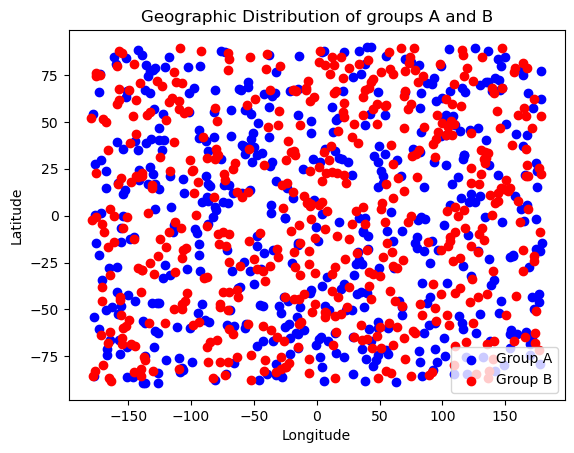

In [34]:
# Plot
plt.scatter(group_A['longitude'], group_A['latitude'], c='blue', label='Group A')
plt.scatter(group_B['longitude'], group_B['latitude'], c='red', label='Group B')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Geographic Distribution of groups A and B')
plt.show()

Based on the analysis of the data, we have no statistical evidence to state that geographic region has an influence on the average conversion rate in the data analyzed.